## 천재교육_2기_이윤섭

### <필수 분석 2_2번>
* 수익을 정리해 시각화해보자
    - 월별 실제 수익 (처리상황, 할부기간 고려)
    - 월별 시각화에서 연도의 변화는 무시한다 (2021년 1월, 2022년 1월 같은 1월로 처리한다.)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
df=pd.read_excel('./미니프로젝트-쇼핑몰 실습데이터.xlsx')
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN


In [3]:
df['할부기간']=df['할부기간'].fillna('일시불')

In [4]:
m=df['처리상태']=='구매확정'

In [5]:
df_buy=df[m]

In [6]:
q=df_buy['할부기간']=='일시불'

In [7]:
df_1=df_buy[q]
df_halbu=df_buy[-q]

In [8]:
df_1

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,일시불
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,일시불
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,일시불
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,일시불
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,일시불
...,...,...,...,...,...,...,...,...,...,...,...,...
217852,221106231538662,다우기술,[올리브영] 기프트카드 1만원권,올리브영,2,19200,신용카드,2022-11-06 23:13:17,구매확정,N,NaN,일시불
217914,221107074704768,다우기술,[따뜻달달특가] 빽다방-빽′s카페라떼(HOT),빽다방,1,2550,신용카드,2022-11-07 07:44:43,구매확정,N,NaN,일시불
217927,221107081217959,다우기술,[GS25] 모바일 상품권 2천원권,GS25,1,1800,신 + 포,2022-11-07 08:09:57,구매확정,N,NaN,일시불
217938,221107083418760,다우기술,[이디야] 연유 카페라떼 HOT,이디야,1,3400,포인트,2022-11-07 08:31:57,구매확정,N,NaN,일시불


In [9]:
df_halbu

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
25732,201020183220408,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,2,768000,후불,2020-10-20 18:31:58,구매확정,N,NaN,12개월
25738,201020195545933,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,5,1920000,후불,2020-10-20 19:55:24,구매확정,N,NaN,12개월
25739,201020204237280,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,2,768000,후불,2020-10-20 20:42:16,구매확정,N,NaN,12개월
25774,201021044814392,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,5,1920000,후불,2020-10-21 04:47:52,구매확정,N,NaN,24개월
25775,201021075232223,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,5,1920000,후불,2020-10-21 07:52:11,구매확정,N,NaN,24개월
...,...,...,...,...,...,...,...,...,...,...,...,...
211630,221024174706971,천재태블릿,[스마트 HBM] 학습 전용 태블릿-정기결제,삼성전자,1,396000,정 + 적 + 포,2022-10-24 17:44:47,구매확정,N,NaN,1개월
212433,221025214536202,천재태블릿,[스마트 HBE] 학습 전용 태블릿-정기결제,삼성전자,8,3168000,정기결제,2022-10-25 21:43:17,구매확정,N,NaN,18개월
212630,221026132724396,천재태블릿,[스마트 HBE] 학습 전용 태블릿-정기결제,삼성전자,1,396000,정기결제,2022-10-26 13:25:05,구매확정,N,NaN,12개월
213502,221027171416474,천재태블릿,[스마트 HBE] 학습 전용 태블릿-정기결제,삼성전자,1,396000,정기결제,2022-10-27 17:11:57,구매확정,N,NaN,12개월


In [10]:
df_1=df_1.reset_index()
df_1=df_1.drop(['index'],axis='columns')

df_halbu=df_halbu.reset_index()
df_halbu=df_halbu.drop(['index'],axis='columns')

In [11]:
df_halbu['할부기간']=df_halbu['할부기간'].replace('개월', '',regex=True)

In [12]:
df_halbu

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,201020183220408,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,2,768000,후불,2020-10-20 18:31:58,구매확정,N,NaN,12
1,201020195545933,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,5,1920000,후불,2020-10-20 19:55:24,구매확정,N,NaN,12
2,201020204237280,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,2,768000,후불,2020-10-20 20:42:16,구매확정,N,NaN,12
3,201021044814392,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,5,1920000,후불,2020-10-21 04:47:52,구매확정,N,NaN,24
4,201021075232223,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,5,1920000,후불,2020-10-21 07:52:11,구매확정,N,NaN,24
...,...,...,...,...,...,...,...,...,...,...,...,...
1586,221024174706971,천재태블릿,[스마트 HBM] 학습 전용 태블릿-정기결제,삼성전자,1,396000,정 + 적 + 포,2022-10-24 17:44:47,구매확정,N,NaN,1
1587,221025214536202,천재태블릿,[스마트 HBE] 학습 전용 태블릿-정기결제,삼성전자,8,3168000,정기결제,2022-10-25 21:43:17,구매확정,N,NaN,18
1588,221026132724396,천재태블릿,[스마트 HBE] 학습 전용 태블릿-정기결제,삼성전자,1,396000,정기결제,2022-10-26 13:25:05,구매확정,N,NaN,12
1589,221027171416474,천재태블릿,[스마트 HBE] 학습 전용 태블릿-정기결제,삼성전자,1,396000,정기결제,2022-10-27 17:11:57,구매확정,N,NaN,12


In [13]:
df_halbu['할부기간']=df_halbu['할부기간'].apply(lambda x: int(x))

In [14]:
df_halbu['청구비용']=df_halbu['판매금액']/df_halbu['할부기간']

In [15]:
df_halbu

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,청구비용
0,201020183220408,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,2,768000,후불,2020-10-20 18:31:58,구매확정,N,NaN,12,64000.0
1,201020195545933,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,5,1920000,후불,2020-10-20 19:55:24,구매확정,N,NaN,12,160000.0
2,201020204237280,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,2,768000,후불,2020-10-20 20:42:16,구매확정,N,NaN,12,64000.0
3,201021044814392,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,5,1920000,후불,2020-10-21 04:47:52,구매확정,N,NaN,24,80000.0
4,201021075232223,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,5,1920000,후불,2020-10-21 07:52:11,구매확정,N,NaN,24,80000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,221024174706971,천재태블릿,[스마트 HBM] 학습 전용 태블릿-정기결제,삼성전자,1,396000,정 + 적 + 포,2022-10-24 17:44:47,구매확정,N,NaN,1,396000.0
1587,221025214536202,천재태블릿,[스마트 HBE] 학습 전용 태블릿-정기결제,삼성전자,8,3168000,정기결제,2022-10-25 21:43:17,구매확정,N,NaN,18,176000.0
1588,221026132724396,천재태블릿,[스마트 HBE] 학습 전용 태블릿-정기결제,삼성전자,1,396000,정기결제,2022-10-26 13:25:05,구매확정,N,NaN,12,33000.0
1589,221027171416474,천재태블릿,[스마트 HBE] 학습 전용 태블릿-정기결제,삼성전자,1,396000,정기결제,2022-10-27 17:11:57,구매확정,N,NaN,12,33000.0


In [69]:
m1=df_halbu['할부기간']==1
m6=df_halbu['할부기간']==6
m12=df_halbu['할부기간']==12
m18=df_halbu['할부기간']==18
m24=df_halbu['할부기간']==24

In [70]:
df1=df_halbu[m1]
df6=df_halbu[m6]
df12=df_halbu[m12]
df18=df_halbu[m18]
df24=df_halbu[m24]

In [71]:
df1=df1.reset_index()
df6=df6.reset_index()
df12=df12.reset_index()
df18=df18.reset_index()
df24=df24.reset_index()
df1=df1.drop(['index'],axis='columns')
df6=df6.drop(['index'],axis='columns')
df12=df12.drop(['index'],axis='columns')
df18=df18.drop(['index'],axis='columns')
df24=df24.drop(['index'],axis='columns')

In [72]:
df6

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,청구비용
0,201208115501198,지니 태블릿,[스마트 HBE] 학습 전용 태블릿(정기결제),삼성전자,3,1188000,정 + 포,2020-12-08 11:54:32,구매확정,N,NaN,6,198000.0
1,201208132000760,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(정기결제),삼성전자,1,396000,정기결제,2020-12-08 13:19:31,구매확정,N,NaN,6,66000.0
2,201208132342108,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(정기결제),삼성전자,5,1980000,정기결제,2020-12-08 13:23:13,구매확정,N,NaN,6,330000.0
3,201208152837927,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(정기결제),삼성전자,1,396000,정 + 포,2020-12-08 15:28:08,구매확정,N,NaN,6,66000.0
4,201208190153355,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(정기결제),삼성전자,1,396000,정기결제,2020-12-08 19:01:24,구매확정,N,NaN,6,66000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,220927192012212,천재태블릿,[스마트 HBE] 학습 전용 태블릿-정기결제,삼성전자,3,1188000,정기결제,2022-09-27 19:17:56,구매확정,N,NaN,6,198000.0
322,221004072402522,천재태블릿,[스마트 HBE] 학습 전용 태블릿-정기결제,삼성전자,5,1980000,정 + 적 + 포,2022-10-04 07:21:45,구매확정,N,NaN,6,330000.0
323,221004163557336,천재태블릿,[스마트 HBM] 학습 전용 태블릿-정기결제,삼성전자,1,396000,정기결제,2022-10-04 16:33:40,구매확정,N,NaN,6,66000.0
324,221020164248163,천재태블릿,[스마트 HBM] 학습 전용 태블릿-정기결제,삼성전자,1,396000,정 + 적 + 포,2022-10-20 16:40:30,구매확정,N,NaN,6,66000.0


In [73]:
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
list6=[]
list7=[]
list8=[]
list9=[]
list10=[]
list11=[]
list12=[]

def func6(x):
    for i in range(6):
        if int(str(df6.iloc[x,7]).split('-')[1])+i==1:
            list1.append(df6.iloc[x,12])
        elif int(str(df6.iloc[x,7]).split('-')[1])+i==2:
            list2.append(df6.iloc[x,12])
        elif int(str(df6.iloc[x,7]).split('-')[1])+i==3:
            list3.append(df6.iloc[x,12])
        elif int(str(df6.iloc[x,7]).split('-')[1])+i==4:
            list4.append(df6.iloc[x,12])
        elif int(str(df6.iloc[x,7]).split('-')[1])+i==5:
            list5.append(df6.iloc[x,12])
        elif int(str(df6.iloc[x,7]).split('-')[1])+i==6:
            list6.append(df6.iloc[x,12])
        elif int(str(df6.iloc[x,7]).split('-')[1])+i==7:
            list7.append(df6.iloc[x,12])
        elif int(str(df6.iloc[x,7]).split('-')[1])+i==8:
            list8.append(df6.iloc[x,12])
        elif int(str(df6.iloc[x,7]).split('-')[1])+i==9:
            list9.append(df6.iloc[x,12])
        elif int(str(df6.iloc[x,7]).split('-')[1])+i==10:
            list10.append(df6.iloc[x,12])
        elif int(str(df6.iloc[x,7]).split('-')[1])+i==11:
            list11.append(df6.iloc[x,12])
        elif int(str(df6.iloc[x,7]).split('-')[1])+i==12:
            list12.append(df6.iloc[x,12])
        elif int(str(df6.iloc[x,7]).split('-')[1])+i==13:
            list1.append(df6.iloc[x,12])
        elif int(str(df6.iloc[x,7]).split('-')[1])+i==14:
            list2.append(df6.iloc[x,12])
        elif int(str(df6.iloc[x,7]).split('-')[1])+i==15:
            list3.append(df6.iloc[x,12])
        elif int(str(df6.iloc[x,7]).split('-')[1])+i==16:
            list4.append(df6.iloc[x,12])
        elif int(str(df6.iloc[x,7]).split('-')[1])+i==17:
            list5.append(df6.iloc[x,12])
        elif int(str(df6.iloc[x,7]).split('-')[1])+i==18:
            list6.append(df6.iloc[x,12])

In [74]:
for i in range(len(df6.index)):
    func6(i)

In [75]:
money6_1=pd.DataFrame(list1)
money6_2=pd.DataFrame(list2)
money6_3=pd.DataFrame(list3)
money6_4=pd.DataFrame(list4)
money6_5=pd.DataFrame(list5)
money6_6=pd.DataFrame(list6)
money6_7=pd.DataFrame(list7)
money6_8=pd.DataFrame(list8)
money6_9=pd.DataFrame(list9)
money6_10=pd.DataFrame(list10)
money6_11=pd.DataFrame(list11)
money6_12=pd.DataFrame(list12)
money6_1_sum=money6_1.sum()
money6_2_sum=money6_2.sum()
money6_3_sum=money6_3.sum()
money6_4_sum=money6_4.sum()
money6_5_sum=money6_5.sum()
money6_6_sum=money6_6.sum()
money6_7_sum=money6_7.sum()
money6_8_sum=money6_8.sum()
money6_9_sum=money6_9.sum()
money6_10_sum=money6_10.sum()
money6_11_sum=money6_11.sum()
money6_12_sum=money6_12.sum()

In [76]:
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
list6=[]
list7=[]
list8=[]
list9=[]
list10=[]
list11=[]
list12=[]

def func12(x):
    for i in range(12):
        if int(str(df12.iloc[x,7]).split('-')[1])+i==1:
            list1.append(df12.iloc[x,12])
        elif int(str(df12.iloc[x,7]).split('-')[1])+i==2:
            list2.append(df12.iloc[x,12])
        elif int(str(df12.iloc[x,7]).split('-')[1])+i==3:
            list3.append(df12.iloc[x,12])
        elif int(str(df12.iloc[x,7]).split('-')[1])+i==4:
            list4.append(df12.iloc[x,12])
        elif int(str(df12.iloc[x,7]).split('-')[1])+i==5:
            list5.append(df12.iloc[x,12])
        elif int(str(df12.iloc[x,7]).split('-')[1])+i==6:
            list6.append(df12.iloc[x,12])
        elif int(str(df12.iloc[x,7]).split('-')[1])+i==7:
            list7.append(df12.iloc[x,12])
        elif int(str(df12.iloc[x,7]).split('-')[1])+i==8:
            list8.append(df12.iloc[x,12])
        elif int(str(df12.iloc[x,7]).split('-')[1])+i==9:
            list9.append(df12.iloc[x,12])
        elif int(str(df12.iloc[x,7]).split('-')[1])+i==10:
            list10.append(df12.iloc[x,12])
        elif int(str(df12.iloc[x,7]).split('-')[1])+i==11:
            list11.append(df12.iloc[x,12])
        elif int(str(df12.iloc[x,7]).split('-')[1])+i==12:
            list12.append(df12.iloc[x,12])
        elif int(str(df12.iloc[x,7]).split('-')[1])+i==13:
            list1.append(df12.iloc[x,12])
        elif int(str(df12.iloc[x,7]).split('-')[1])+i==14:
            list2.append(df12.iloc[x,12])
        elif int(str(df12.iloc[x,7]).split('-')[1])+i==15:
            list3.append(df12.iloc[x,12])
        elif int(str(df12.iloc[x,7]).split('-')[1])+i==16:
            list4.append(df12.iloc[x,12])
        elif int(str(df12.iloc[x,7]).split('-')[1])+i==17:
            list5.append(df12.iloc[x,12])
        elif int(str(df12.iloc[x,7]).split('-')[1])+i==18:
            list6.append(df12.iloc[x,12])
        elif int(str(df12.iloc[x,7]).split('-')[1])+i==19:
            list7.append(df12.iloc[x,12])
        elif int(str(df12.iloc[x,7]).split('-')[1])+i==20:
            list8.append(df12.iloc[x,12])
        elif int(str(df12.iloc[x,7]).split('-')[1])+i==21:
            list9.append(df12.iloc[x,12])
        elif int(str(df12.iloc[x,7]).split('-')[1])+i==22:
            list10.append(df12.iloc[x,12])
        elif int(str(df12.iloc[x,7]).split('-')[1])+i==23:
            list11.append(df12.iloc[x,12])
        elif int(str(df12.iloc[x,7]).split('-')[1])+i==24:
            list12.append(df12.iloc[x,12])

In [77]:
for i in range(len(df12.index)):
    func12(i)

In [78]:
money12_1=pd.DataFrame(list1)
money12_2=pd.DataFrame(list2)
money12_3=pd.DataFrame(list3)
money12_4=pd.DataFrame(list4)
money12_5=pd.DataFrame(list5)
money12_6=pd.DataFrame(list6)
money12_7=pd.DataFrame(list7)
money12_8=pd.DataFrame(list8)
money12_9=pd.DataFrame(list9)
money12_10=pd.DataFrame(list10)
money12_11=pd.DataFrame(list11)
money12_12=pd.DataFrame(list12)
money12_1_sum=money12_1.sum()
money12_2_sum=money12_2.sum()
money12_3_sum=money12_3.sum()
money12_4_sum=money12_4.sum()
money12_5_sum=money12_5.sum()
money12_6_sum=money12_6.sum()
money12_7_sum=money12_7.sum()
money12_8_sum=money12_8.sum()
money12_9_sum=money12_9.sum()
money12_10_sum=money12_10.sum()
money12_11_sum=money12_11.sum()
money12_12_sum=money12_12.sum()

In [79]:
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
list6=[]
list7=[]
list8=[]
list9=[]
list10=[]
list11=[]
list12=[]

def func18(x):
    for i in range(18):
        if int(str(df18.iloc[x,7]).split('-')[1])+i==1:
            list1.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==2:
            list2.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==3:
            list3.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==4:
            list4.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==5:
            list5.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==6:
            list6.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==7:
            list7.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==8:
            list8.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==9:
            list9.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==10:
            list10.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==11:
            list11.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==12:
            list12.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==13:
            list1.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==14:
            list2.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==15:
            list3.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==16:
            list4.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==17:
            list5.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==18:
            list6.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==19:
            list7.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==20:
            list8.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==21:
            list9.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==22:
            list10.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==23:
            list11.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==24:
            list12.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==25:
            list1.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==26:
            list2.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==27:
            list3.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==28:
            list4.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==29:
            list5.append(df18.iloc[x,12])
        elif int(str(df18.iloc[x,7]).split('-')[1])+i==30:
            list6.append(df18.iloc[x,12])

In [80]:
for i in range(len(df18.index)):
    func18(i)

In [81]:
money18_1=pd.DataFrame(list1)
money18_2=pd.DataFrame(list2)
money18_3=pd.DataFrame(list3)
money18_4=pd.DataFrame(list4)
money18_5=pd.DataFrame(list5)
money18_6=pd.DataFrame(list6)
money18_7=pd.DataFrame(list7)
money18_8=pd.DataFrame(list8)
money18_9=pd.DataFrame(list9)
money18_10=pd.DataFrame(list10)
money18_11=pd.DataFrame(list11)
money18_12=pd.DataFrame(list12)
money18_1_sum=money18_1.sum()
money18_2_sum=money18_2.sum()
money18_3_sum=money18_3.sum()
money18_4_sum=money18_4.sum()
money18_5_sum=money18_5.sum()
money18_6_sum=money18_6.sum()
money18_7_sum=money18_7.sum()
money18_8_sum=money18_8.sum()
money18_9_sum=money18_9.sum()
money18_10_sum=money18_10.sum()
money18_11_sum=money18_11.sum()
money18_12_sum=money18_12.sum()

In [82]:
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
list6=[]
list7=[]
list8=[]
list9=[]
list10=[]
list11=[]
list12=[]

def func24(x):
    for i in range(24):
        if int(str(df24.iloc[x,7]).split('-')[1])+i==1:
            list1.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==2:
            list2.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==3:
            list3.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==4:
            list4.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==5:
            list5.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==6:
            list6.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==7:
            list7.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==8:
            list8.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==9:
            list9.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==10:
            list10.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==11:
            list11.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==12:
            list12.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==13:
            list1.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==14:
            list2.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==15:
            list3.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==16:
            list4.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==17:
            list5.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==18:
            list6.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==19:
            list7.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==20:
            list8.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==21:
            list9.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==22:
            list10.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==23:
            list11.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==24:
            list12.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==25:
            list1.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==26:
            list2.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==27:
            list3.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==28:
            list4.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==29:
            list5.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==30:
            list6.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==31:
            list7.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==32:
            list8.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==33:
            list9.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==34:
            list10.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==35:
            list11.append(df24.iloc[x,12])
        elif int(str(df24.iloc[x,7]).split('-')[1])+i==36:
            list12.append(df24.iloc[x,12])

In [83]:
for i in range(len(df24.index)):
    func24(i)

In [84]:
money24_1=pd.DataFrame(list1)
money24_2=pd.DataFrame(list2)
money24_3=pd.DataFrame(list3)
money24_4=pd.DataFrame(list4)
money24_5=pd.DataFrame(list5)
money24_6=pd.DataFrame(list6)
money24_7=pd.DataFrame(list7)
money24_8=pd.DataFrame(list8)
money24_9=pd.DataFrame(list9)
money24_10=pd.DataFrame(list10)
money24_11=pd.DataFrame(list11)
money24_12=pd.DataFrame(list12)
money24_1_sum=money24_1.sum()
money24_2_sum=money24_2.sum()
money24_3_sum=money24_3.sum()
money24_4_sum=money24_4.sum()
money24_5_sum=money24_5.sum()
money24_6_sum=money24_6.sum()
money24_7_sum=money24_7.sum()
money24_8_sum=money24_8.sum()
money24_9_sum=money24_9.sum()
money24_10_sum=money24_10.sum()
money24_11_sum=money24_11.sum()
money24_12_sum=money24_12.sum()

In [85]:
df1

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,청구비용
0,201021082040861,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,5,1920000,후불,2020-10-21 08:20:19,구매확정,N,NaN,1,1920000.0
1,201021085309707,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,3,1152000,후불,2020-10-21 08:52:48,구매확정,N,NaN,1,1152000.0
2,201021090918789,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,12,4608000,후불,2020-10-21 09:08:56,구매확정,N,NaN,1,4608000.0
3,201021095313651,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,3,1152000,후 + 포,2020-10-21 09:52:52,구매확정,N,NaN,1,1152000.0
4,201021102040481,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,4,1536000,후 + 포,2020-10-21 10:20:18,구매확정,N,NaN,1,1536000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,221006142346422,천재태블릿,[스마트 HBM] 학습 전용 태블릿-정기결제,삼성전자,1,396000,정기결제,2022-10-06 14:21:30,구매확정,N,NaN,1,396000.0
397,221006194809692,천재태블릿,[스마트 HBE] 학습 전용 태블릿-정기결제,삼성전자,2,792000,정기결제,2022-10-06 19:45:52,구매확정,N,NaN,1,792000.0
398,221006200451937,천재태블릿,[스마트 HBM] 학습 전용 태블릿-정기결제,삼성전자,1,396000,정기결제,2022-10-06 20:02:34,구매확정,N,NaN,1,396000.0
399,221018162224974,천재태블릿,[스마트 HBE] 학습 전용 태블릿-정기결제,삼성전자,1,396000,정 + 포,2022-10-18 16:20:06,구매확정,N,NaN,1,396000.0


In [86]:
df_1

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,일시불
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,일시불
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,일시불
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,일시불
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,일시불
...,...,...,...,...,...,...,...,...,...,...,...,...
157695,221106231538662,다우기술,[올리브영] 기프트카드 1만원권,올리브영,2,19200,신용카드,2022-11-06 23:13:17,구매확정,N,NaN,일시불
157696,221107074704768,다우기술,[따뜻달달특가] 빽다방-빽′s카페라떼(HOT),빽다방,1,2550,신용카드,2022-11-07 07:44:43,구매확정,N,NaN,일시불
157697,221107081217959,다우기술,[GS25] 모바일 상품권 2천원권,GS25,1,1800,신 + 포,2022-11-07 08:09:57,구매확정,N,NaN,일시불
157698,221107083418760,다우기술,[이디야] 연유 카페라떼 HOT,이디야,1,3400,포인트,2022-11-07 08:31:57,구매확정,N,NaN,일시불


In [87]:
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
list6=[]
list7=[]
list8=[]
list9=[]
list10=[]
list11=[]
list12=[]

for i in df1.index:
    if int(str(df1.iloc[i,7]).split('-')[1]) == 1:
        list1.append([df1.iloc[i,7],df1.iloc[i,5]])
        list21=pd.DataFrame(list1)
        sum1=list21[1].sum()
    elif int(str(df1.iloc[i,7]).split('-')[1]) == 2:
        list2.append([df1.iloc[i,7],df1.iloc[i,5]])
        list22=pd.DataFrame(list2)
        sum2=list22[1].sum()
    elif int(str(df1.iloc[i,7]).split('-')[1]) == 3:
        list3.append([df1.iloc[i,7],df1.iloc[i,5]])
        list23=pd.DataFrame(list3)
        sum3=list23[1].sum()
    elif int(str(df1.iloc[i,7]).split('-')[1]) == 4:
        list4.append([df1.iloc[i,7],df1.iloc[i,5]])
        list24=pd.DataFrame(list4)
        sum4=list24[1].sum()
    elif int(str(df1.iloc[i,7]).split('-')[1]) == 5:
        list5.append([df1.iloc[i,7],df1.iloc[i,5]])
        list25=pd.DataFrame(list5)
        sum5=list25[1].sum()
    elif int(str(df1.iloc[i,7]).split('-')[1]) == 6:
        list6.append([df1.iloc[i,7],df1.iloc[i,5]])
        list26=pd.DataFrame(list6)
        sum6=list26[1].sum()
    elif int(str(df1.iloc[i,7]).split('-')[1]) == 7:
        list7.append([df1.iloc[i,7],df1.iloc[i,5]])
        list27=pd.DataFrame(list7)
        sum7=list27[1].sum()

    elif int(str(df1.iloc[i,7]).split('-')[1]) == 8:
        list8.append([df1.iloc[i,7],df1.iloc[i,5]])
        list28=pd.DataFrame(list8)
        sum8=list28[1].sum()

    elif int(str(df1.iloc[i,7]).split('-')[1]) == 9:
        list9.append([df1.iloc[i,7],df1.iloc[i,5]])
        list29=pd.DataFrame(list9)
        sum9=list29[1].sum()

    elif int(str(df1.iloc[i,7]).split('-')[1]) == 10:
        list10.append([df1.iloc[i,7],df1.iloc[i,5]])
        list30=pd.DataFrame(list10)
        sum10=list30[1].sum()

    elif int(str(df1.iloc[i,7]).split('-')[1]) == 11:
        list11.append([df1.iloc[i,7],df1.iloc[i,5]])
        list31=pd.DataFrame(list11)
        sum11=list31[1].sum()

    elif int(str(df1.iloc[i,7]).split('-')[1]) == 12:
        list12.append([df1.iloc[i,7],df1.iloc[i,5]])
        list32=pd.DataFrame(list12)
        sum12=list32[1].sum()


In [92]:
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
list6=[]
list7=[]
list8=[]
list9=[]
list10=[]
list11=[]
list12=[]

for i in df_1.index:
    if int(str(df_1.iloc[i,7]).split('-')[1]) == 1:
        list1.append([df_1.iloc[i,7],df_1.iloc[i,5]])
        list21=pd.DataFrame(list1)
        sum_1=list21[1].sum()
    elif int(str(df_1.iloc[i,7]).split('-')[1]) == 2:
        list2.append([df_1.iloc[i,7],df_1.iloc[i,5]])
        list22=pd.DataFrame(list2)
        sum_2=list22[1].sum()
    elif int(str(df_1.iloc[i,7]).split('-')[1]) == 3:
        list3.append([df_1.iloc[i,7],df_1.iloc[i,5]])
        list23=pd.DataFrame(list3)
        sum_3=list23[1].sum()
    elif int(str(df_1.iloc[i,7]).split('-')[1]) == 4:
        list4.append([df_1.iloc[i,7],df_1.iloc[i,5]])
        list24=pd.DataFrame(list4)
        sum_4=list24[1].sum()
    elif int(str(df_1.iloc[i,7]).split('-')[1]) == 5:
        list5.append([df_1.iloc[i,7],df_1.iloc[i,5]])
        list25=pd.DataFrame(list5)
        sum_5=list25[1].sum()
    elif int(str(df_1.iloc[i,7]).split('-')[1]) == 6:
        list6.append([df_1.iloc[i,7],df_1.iloc[i,5]])
        list26=pd.DataFrame(list6)
        sum_6=list26[1].sum()
    elif int(str(df_1.iloc[i,7]).split('-')[1]) == 7:
        list7.append([df_1.iloc[i,7],df_1.iloc[i,5]])
        list27=pd.DataFrame(list7)
        sum_7=list27[1].sum()

    elif int(str(df_1.iloc[i,7]).split('-')[1]) == 8:
        list8.append([df_1.iloc[i,7],df_1.iloc[i,5]])
        list28=pd.DataFrame(list8)
        sum_8=list28[1].sum()

    elif int(str(df_1.iloc[i,7]).split('-')[1]) == 9:
        list9.append([df_1.iloc[i,7],df_1.iloc[i,5]])
        list29=pd.DataFrame(list9)
        sum_9=list29[1].sum()

    elif int(str(df_1.iloc[i,7]).split('-')[1]) == 10:
        list10.append([df_1.iloc[i,7],df_1.iloc[i,5]])
        list30=pd.DataFrame(list10)
        sum_10=list30[1].sum()

    elif int(str(df_1.iloc[i,7]).split('-')[1]) == 11:
        list11.append([df_1.iloc[i,7],df_1.iloc[i,5]])
        list31=pd.DataFrame(list11)
        sum_11=list31[1].sum()

    elif int(str(df_1.iloc[i,7]).split('-')[1]) == 12:
        list12.append([df_1.iloc[i,7],df_1.iloc[i,5]])
        list32=pd.DataFrame(list12)
        sum_12=list32[1].sum()


In [93]:
halbu1=money6_1_sum+money12_1_sum+money18_1_sum+money24_1_sum
halbu2=money6_2_sum+money12_2_sum+money18_2_sum+money24_2_sum
halbu3=money6_3_sum+money12_3_sum+money18_3_sum+money24_3_sum
halbu4=money6_4_sum+money12_4_sum+money18_4_sum+money24_4_sum
halbu5=money6_5_sum+money12_5_sum+money18_5_sum+money24_5_sum
halbu6=money6_6_sum+money12_6_sum+money18_6_sum+money24_6_sum
halbu7=money6_7_sum+money12_7_sum+money18_7_sum+money24_7_sum
halbu8=money6_8_sum+money12_8_sum+money18_8_sum+money24_8_sum
halbu9=money6_9_sum+money12_9_sum+money18_9_sum+money24_9_sum
halbu10=money6_10_sum+money12_10_sum+money18_10_sum+money24_10_sum
halbu11=money6_11_sum+money12_11_sum+money18_11_sum+money24_11_sum
halbu12=money6_12_sum+money12_12_sum+money18_12_sum+money24_12_sum

In [94]:
full1=sum_1+sum1
full2=sum_2+sum1
full3=sum_3+sum1
full4=sum_4+sum1
full5=sum_5+sum1
full6=sum_6+sum1
full7=sum_7+sum1
full8=sum_8+sum1
full9=sum_9+sum1
full10=sum_10+sum1
full11=sum_11+sum1
full12=sum_12+sum1

In [95]:
a=(halbu1[0],halbu2[0],halbu3[0],halbu4[0],halbu5[0],halbu6[0],halbu7[0],halbu8[0],halbu9[0],halbu10[0],halbu11[0],halbu12[0])

In [96]:
b=(full1,full2,full3,full4,full5,full6,full7,full8,full9,full10,full11,full12)

In [97]:
h1=pd.DataFrame(a,columns=['할부'])
h1['할부']=h1['할부'].apply(lambda x: int(x))
h1['월']=[1,2,3,4,5,6,7,8,9,10,11,12]
h1['할부']=h1['할부'].apply(lambda x: x/100000000)
h1['결재방법']='할부'
h1=h1[['월','할부','결재방법']]
h1 = h1.set_index("월")

In [98]:
h1

,할부,결재방법
월,,
1,1.08327,할부
2,1.08173,할부
3,1.11253,할부
4,1.10307,할부
5,1.13761,할부
6,1.10109,할부
7,1.10351,할부
8,1.10505,할부
9,1.07425,할부


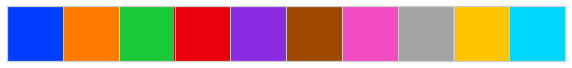

In [114]:
palette = sns.color_palette("bright")
sns.palplot(palette)
sns.set_palette("pastel")
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Malgun Gothic'

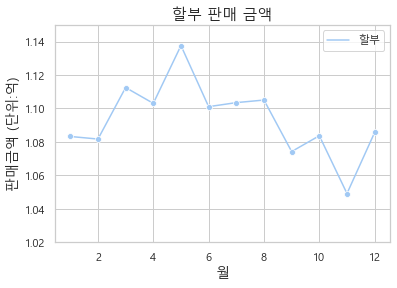

In [115]:
ax = sns.lineplot(data=h1,  marker='o')
plt.title('할부 판매 금액', fontsize=15)
plt.ylabel('판매금액', fontsize=14)
plt.ylabel('판매금액 (단위:억)', fontsize=14)
plt.xlabel('월', fontsize=14)
plt.ylim(1.02,1.15)

plt.savefig('./fig3.jpg',dpi=700)
plt.show()

In [116]:
z1=pd.DataFrame(a,columns=['할부'])
z1['할부']=z1['할부'].apply(lambda x: int(x)/100000000 )
z1['일시불']=pd.DataFrame(b,columns=['일시불'])
z1['일시불']=z1['일시불'].apply(lambda x: x/100000000)
z1['월']=[1,2,3,4,5,6,7,8,9,10,11,12]
z1 = z1.set_index("월")
z1

,할부,일시불
월,,
1,1.08327,5.083393
2,1.08173,6.637798
3,1.11253,8.539609
4,1.10307,5.124818
5,1.13761,9.430580
6,1.10109,4.412622
7,1.10351,4.002590
8,1.10505,6.128958
9,1.07425,5.968971


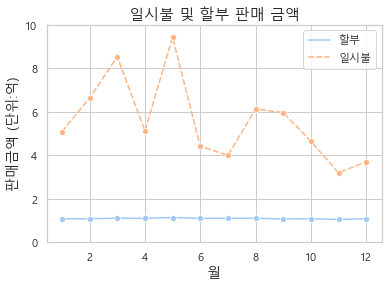

In [117]:
ax = sns.lineplot(data=z1,  marker='o')
plt.title('일시불 및 할부 판매 금액', fontsize=15)
plt.ylabel('판매금액', fontsize=14)
plt.xlabel('월', fontsize=14)
plt.ylim(0,10)
plt.ylabel('판매금액 (단위:억)', fontsize=14)

plt.savefig('./fig4.jpg',dpi=700)
plt.show()

In [118]:
a1=pd.DataFrame(a,columns=['금액'])
a1['금액']=a1['금액'].apply(lambda x: int(x))
a1['월']=[1,2,3,4,5,6,7,8,9,10,11,12]
a1['금액']=a1['금액'].apply(lambda x: x/100000000)
a1['결재방법']='할부'
a1=a1[['월','금액','결재방법']]

In [119]:
a1

,월,금액,결재방법
0,1,1.08327,할부
1,2,1.08173,할부
2,3,1.11253,할부
3,4,1.10307,할부
4,5,1.13761,할부
5,6,1.10109,할부
6,7,1.10351,할부
7,8,1.10505,할부
8,9,1.07425,할부
9,10,1.08371,할부


In [120]:
b1=pd.DataFrame(b,columns=['금액'])
b1['월']=[1,2,3,4,5,6,7,8,9,10,11,12]
b1['금액']=b1['금액'].apply(lambda x: x/100000000)
b1['결재방법']='일시불'
b1=b1[['월','금액','결재방법']]

In [121]:
c1=pd.concat([a1,b1],axis=0)
c1 =c1.sort_values(by=['월', '결재방법'], ascending=True)
c1['금액합계'] = c1.groupby(['월'])['금액'].cumsum(axis=0)
c1 = c1.sort_values(by=['월','금액'], ascending=True)

In [122]:
c1

,월,금액,결재방법,금액합계
0,1,1.083270,할부,6.166663
0,1,5.083393,일시불,5.083393
1,2,1.081730,할부,7.719528
1,2,6.637798,일시불,6.637798
2,3,1.112530,할부,9.652139
2,3,8.539609,일시불,8.539609
3,4,1.103070,할부,6.227888
3,4,5.124818,일시불,5.124818
4,5,1.137610,할부,10.568190
4,5,9.430580,일시불,9.430580


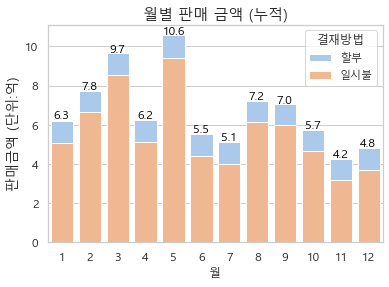

In [123]:
sns.barplot(x='월', y='금액합계', hue='결재방법', data=c1,dodge=False) 
plt.title('월별 판매 금액 (누적)', fontsize=15)
plt.ylabel('판매금액 (단위:억)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.text(-0.3,6.3,'6.3', fontsize=12, color='black')
plt.text(0.7,7.8,'7.8', fontsize=12, color='black')
plt.text(1.7,9.7,'9.7', fontsize=12, color='black')
plt.text(2.7,6.3,'6.2', fontsize=12, color='black')
plt.text(3.6,10.6,'10.6', fontsize=12, color='black')
plt.text(4.7,5.6,'5.5', fontsize=12, color='black')
plt.text(5.7,5.2,'5.1', fontsize=12, color='black')
plt.text(6.7,7.3,'7.2', fontsize=12, color='black')
plt.text(7.7,7.1,'7.0', fontsize=12, color='black')
plt.text(8.7,5.8,'5.7', fontsize=12, color='black')
plt.text(9.7,4.3,'4.2', fontsize=12, color='black')
plt.text(10.7,4.9,'4.8', fontsize=12, color='black')

plt.savefig('./fig5.jpg',dpi=700)
plt.show()

In [58]:
list_all=[8.20302715,
 11.67621265,
 13.83912487,
 7.55775808,
 13.06188345,
 6.77740965,
 7.2545372,
 10.20860565,
 8.8530548,
 12.62633798,
 6.89992304,
 8.37385183]

In [59]:
z1['총합계']=z1['할부']+z1['일시불']

In [60]:
z1['결재금액']=list_all

In [61]:
z2=z1.drop('할부',axis=1).drop('일시불',axis=1)

In [62]:
z2

,총합계,결재금액
월,,
1,6.166663,8.203027
2,7.719528,11.676213
3,9.652139,13.839125
4,6.227888,7.557758
5,10.568190,13.061883
6,5.513712,6.777410
7,5.106100,7.254537
8,7.234008,10.208606
9,7.043221,8.853055


In [63]:
z2.columns = ['Confirm Purchase','Order']

In [64]:
z2

,Confirm Purchase,Order
월,,
1,6.166663,8.203027
2,7.719528,11.676213
3,9.652139,13.839125
4,6.227888,7.557758
5,10.568190,13.061883
6,5.513712,6.777410
7,5.106100,7.254537
8,7.234008,10.208606
9,7.043221,8.853055


In [65]:
z2['diff']=z2['Order']-z2['Confirm Purchase']

In [66]:
z2

,Confirm Purchase,Order,diff
월,,,
1,6.166663,8.203027,2.036364
2,7.719528,11.676213,3.956684
3,9.652139,13.839125,4.186986
4,6.227888,7.557758,1.329870
5,10.568190,13.061883,2.493694
6,5.513712,6.777410,1.263697
7,5.106100,7.254537,2.148437
8,7.234008,10.208606,2.974598
9,7.043221,8.853055,1.809833


In [67]:
z2=z2[['Confirm Purchase','diff','Order']]

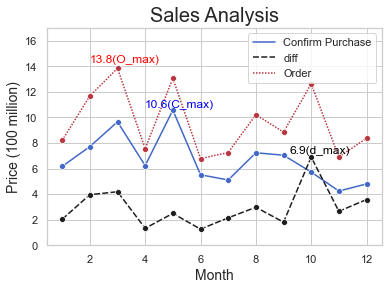

In [112]:
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.set_theme(style="whitegrid")
ax = sns.lineplot(data=z2,  marker='o',palette="icefire")
plt.title('Sales Analysis', fontsize=20)
plt.ylabel('Price (100 million)', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.text(4,10.8,'10.6(C_max)', fontsize=12, color='blue')
plt.text(2,14.3,'13.8(O_max)', fontsize=12, color='red')
plt.text(9.2,7.2,'6.9(d_max)', fontsize=12, color='black')
plt.ylim(0,17)

plt.savefig('./fig6.jpg',dpi=700)
plt.show()